In [ ]:
#code permettant d'ajouter tous les imports dont nous avons besoin
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#ici, on charge les données, en utilisant les jeux de données fournis par la librairie scikit, comme dans les précédents TP. On a choisit d'utiliser d'autres thèmes.
import numpy as np

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

categories = ['comp.graphics', 'rec.sport.baseball', 'sci.med', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
print(f"Nombre de documents : {len(documents)}")

Nombre de documents : 3732


In [ ]:
#on utilise la transformation de matrice TFIDF afin d'avoir un jeu de données plus pertinent. On réduit donc à 1000 le nombre de mots significatifs (max_features)

vectorizer = TfidfVectorizer(stop_words="english",max_features=1000)

X_tfidf = vectorizer.fit_transform(documents)
print(f"Matrice après réduction TFIDF : {X_tfidf.shape}")

Matrice TFIDF : (3732, 1000)


In [ ]:
#on utilise ici la réduction de dimentionnalité LSA comme vu dans les précédents TP
lsa = TruncatedSVD(n_components=2, random_state=42)
X_lsa = lsa.fit_transform(X_tfidf)


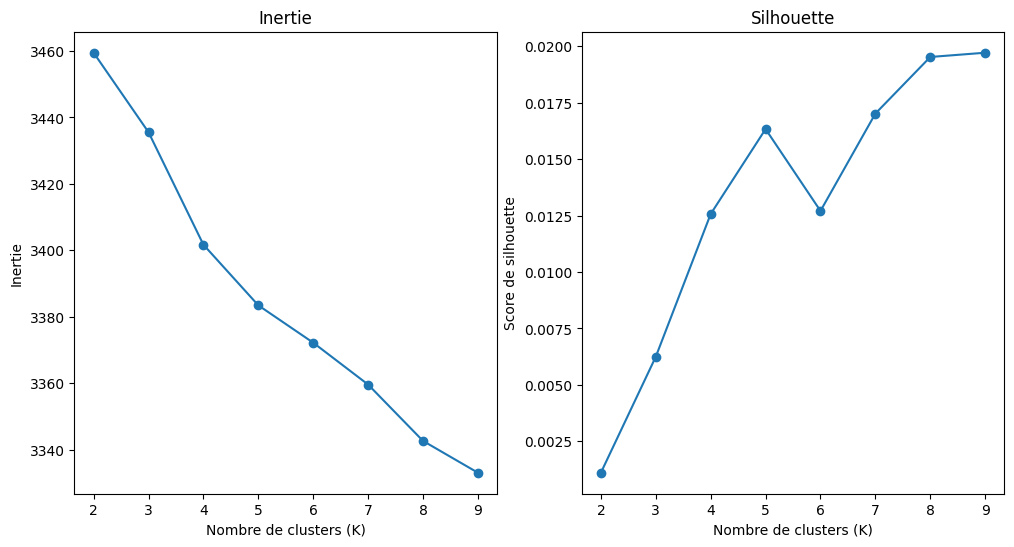

In [ ]:
#ici on va calculer le score de silouhette et l'inertie. Ces métriques permettent de calculer le nombre optimal de clusters
inertia = []
silhouette = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_tfidf)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_tfidf, labels))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Inertie')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette, marker='o')
plt.title('Silhouette')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de silhouette')
plt.show()

In [ ]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)


mb_kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, random_state=42, batch_size=100)
mb_clusters = mb_kmeans.fit_predict(X_tfidf)


agglo = AgglomerativeClustering(n_clusters=optimal_clusters)
agglo_clusters = agglo.fit_predict(X_tfidf.toarray())


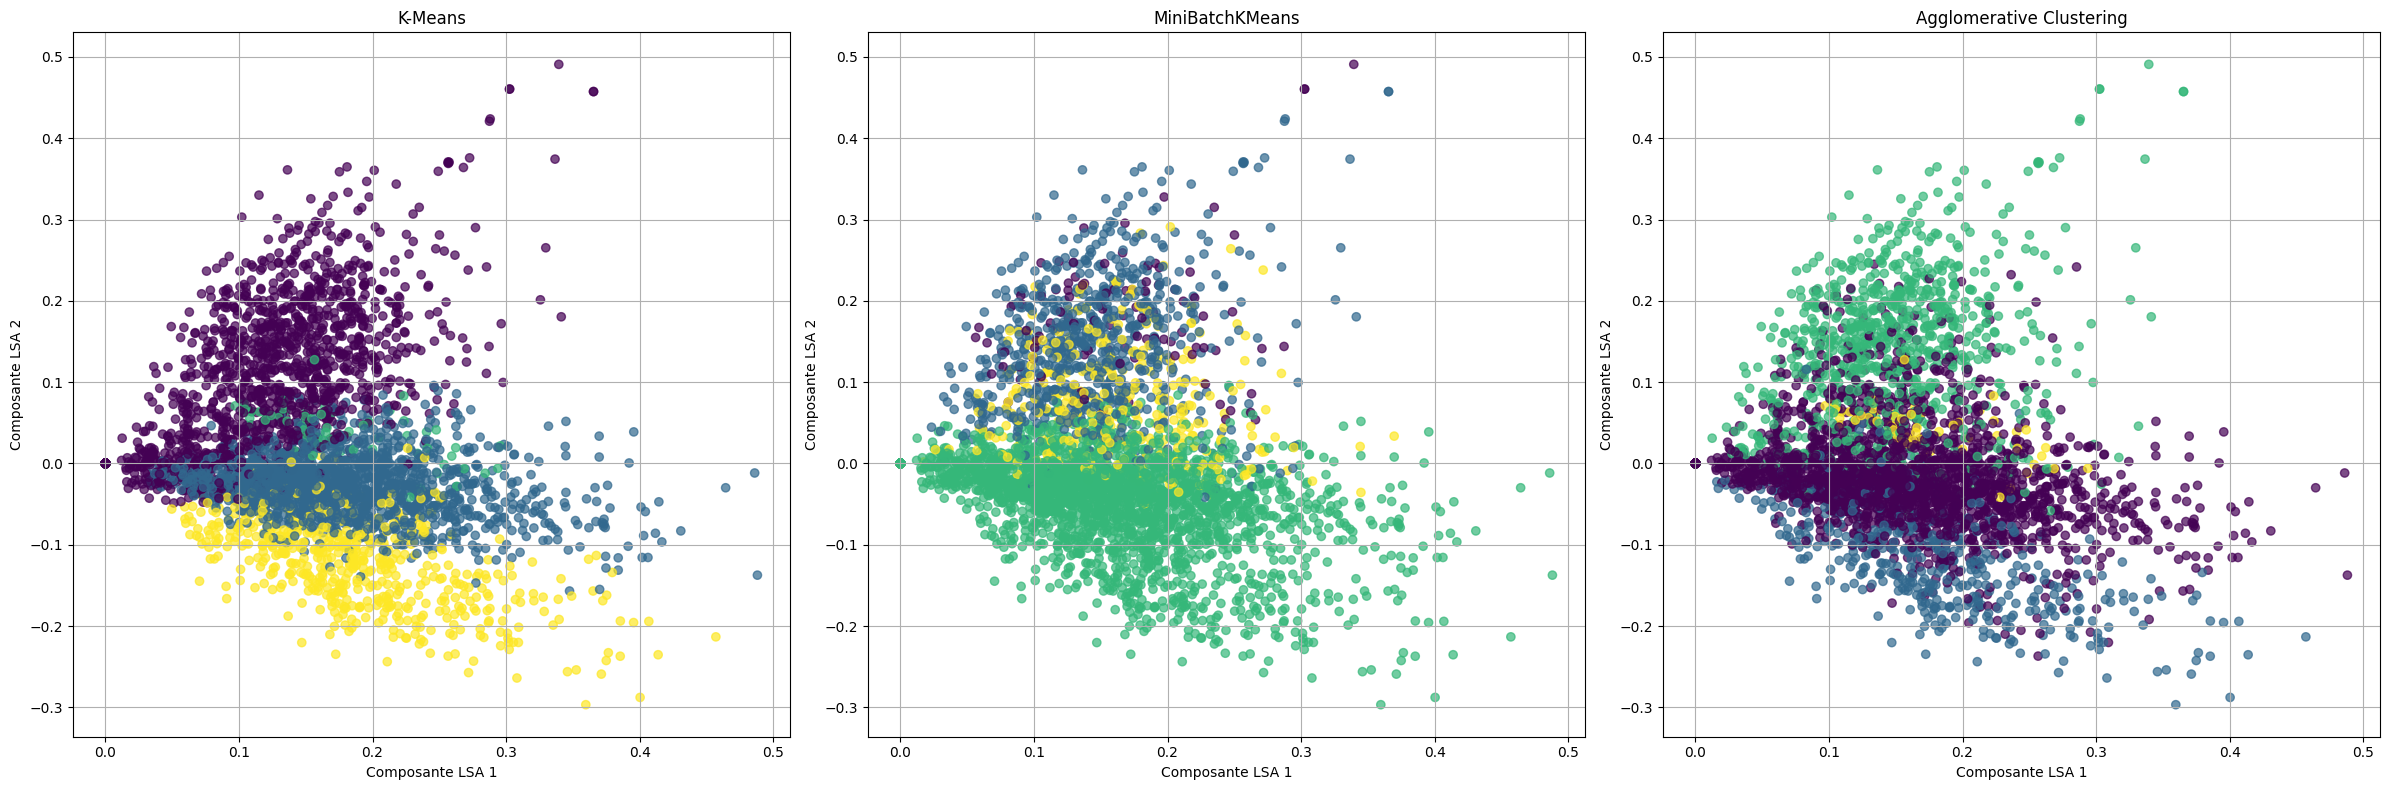

In [ ]:
#on génére trois graphique avec trois algorythme de clusterisation différents, K-Means, MiniBatchKMeans et Agglomerative Clustering
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# visualisation avec K-Means
axes[0].scatter(X_lsa[:, 0], X_lsa[:, 1], c=clusters, cmap='viridis', alpha=0.7)
axes[0].set_title('K-Means')
axes[0].set_xlabel('Composante LSA 1')
axes[0].set_ylabel('Composante LSA 2')
axes[0].grid(True)

# visualisation  avec MiniBatchKMeans
axes[1].scatter(X_lsa[:, 0], X_lsa[:, 1], c=mb_clusters, cmap='viridis', alpha=0.7)
axes[1].set_title('MiniBatchKMeans')
axes[1].set_xlabel('Composante LSA 1')
axes[1].set_ylabel('Composante LSA 2')
axes[1].grid(True)

# visualisation  avec Agglomerative Clustering
axes[2].scatter(X_lsa[:, 0], X_lsa[:, 1], c=agglo_clusters, cmap='viridis', alpha=0.7)
axes[2].set_title('Agglomerative Clustering')
axes[2].set_xlabel('Composante LSA 1')
axes[2].set_ylabel('Composante LSA 2')
axes[2].grid(True)

plt.tight_layout()
plt.show()


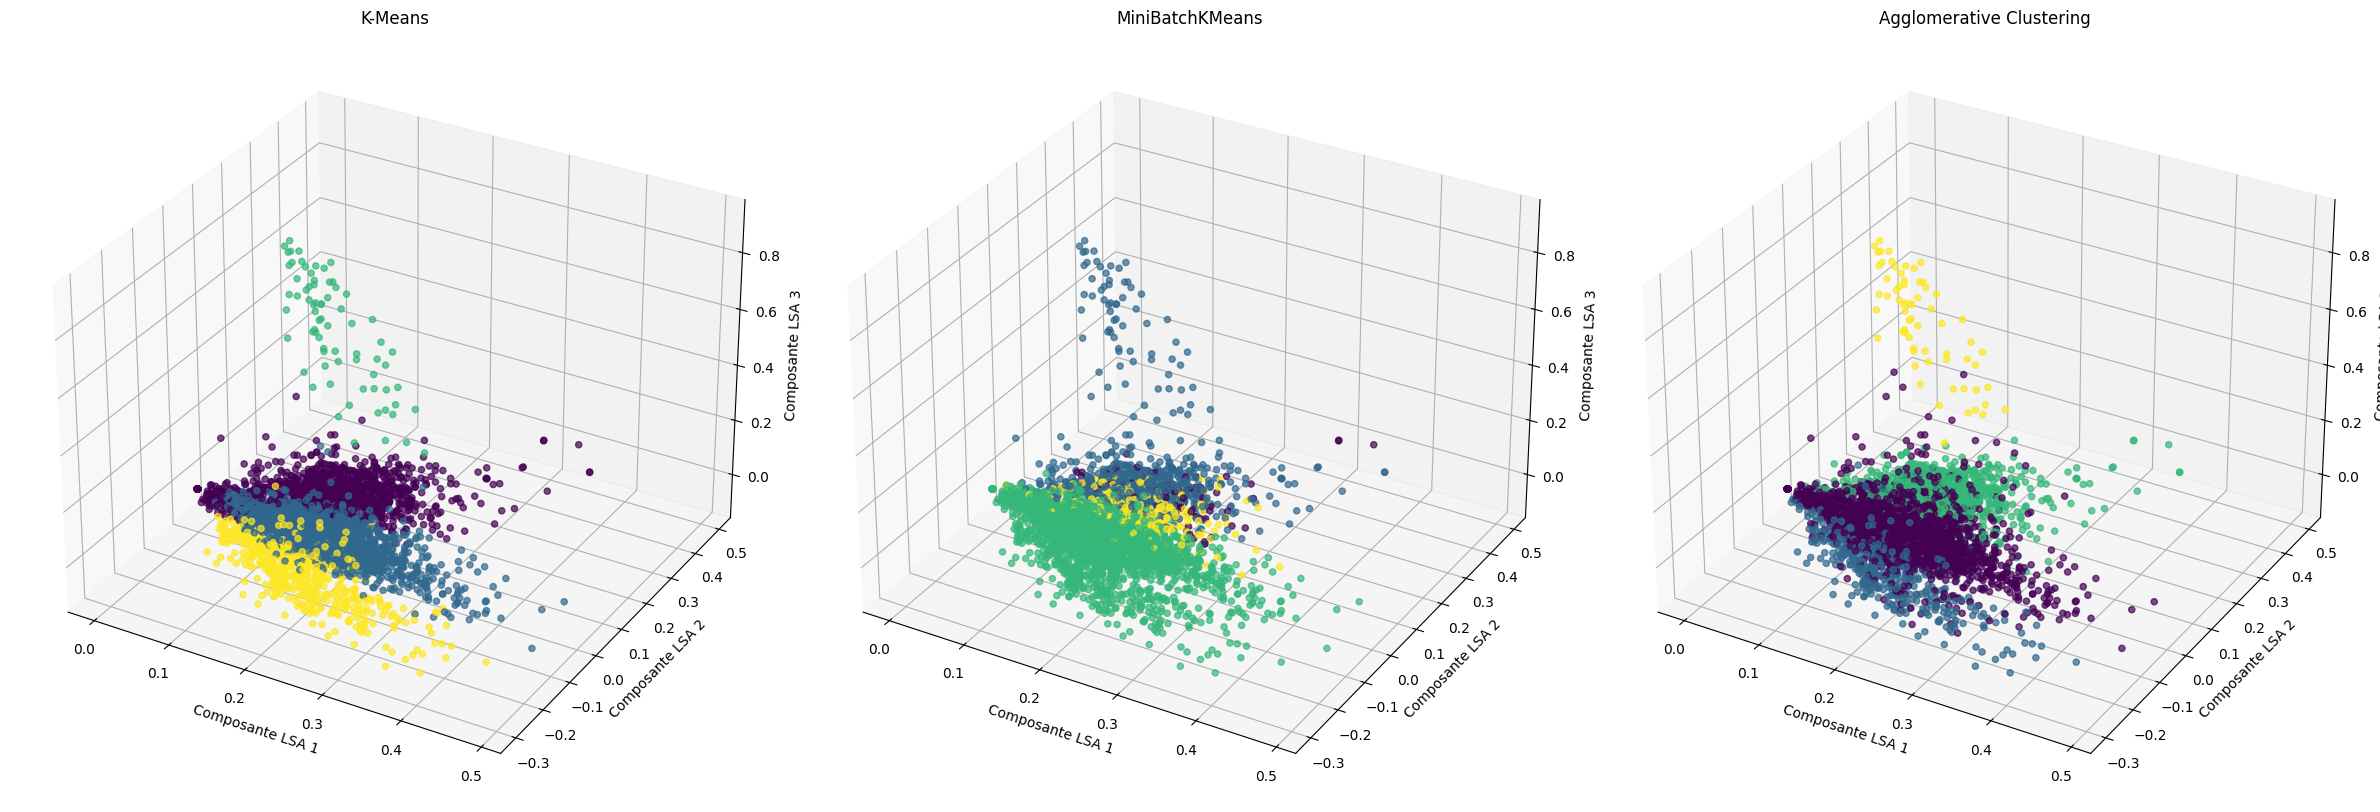

In [ ]:
# on réduit la dimenstionnalité en 3D
lsa_3d = TruncatedSVD(n_components=3, random_state=42)
X_lsa_3d = lsa_3d.fit_transform(X_tfidf)

fig = plt.figure(figsize=(24, 8))

# visualisation avec l'algorythme K-Means
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(X_lsa_3d[:, 0], X_lsa_3d[:, 1], X_lsa_3d[:, 2], c=clusters, cmap='viridis', alpha=0.7)
ax1.set_title('K-Means')
ax1.set_xlabel('Composante LSA 1')
ax1.set_ylabel('Composante LSA 2')
ax1.set_zlabel('Composante LSA 3')

# visualisation avec l'algorythme MiniBatchKMeans
ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(X_lsa_3d[:, 0], X_lsa_3d[:, 1], X_lsa_3d[:, 2], c=mb_clusters, cmap='viridis',alpha=0.7)
ax2.set_title('MiniBatchKMeans')
ax2.set_xlabel('Composante LSA 1')
ax2.set_ylabel('Composante LSA 2')
ax2.set_zlabel('Composante LSA 3')

# visualisation avec l'algorythme Agglomerative Clustering
ax3 = fig.add_subplot(133, projection='3d')
scatter3 = ax3.scatter(X_lsa_3d[:, 0], X_lsa_3d[:, 1], X_lsa_3d[:, 2], c=agglo_clusters, cmap='viridis', alpha=0.7)
ax3.set_title('Agglomerative Clustering')
ax3.set_xlabel('Composante LSA 1')
ax3.set_ylabel('Composante LSA 2')
ax3.set_zlabel('Composante LSA 3')

plt.tight_layout()
plt.show()